# Batch Gradient Descent

### Resources

[Wikipedia: Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)

[Wikipedia: Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

### Hypothesis

$h_\theta(x) = \theta^Tx$

### Cost Function

$J(\theta) = \frac1{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$

### Algorithm

$\theta_j := \theta_j - \frac\partial{\partial\theta_j}J(\theta)$

or

$\theta_j := \theta_j - \alpha\frac1{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$


### Code

time: -2.611160 ms
theta:  [48.96 0.51 -1.15 1.52 -0.73]
prediction:  48.585533604


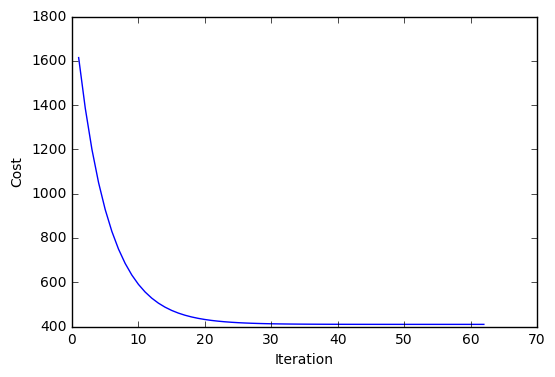

In [64]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

def gd_batch(data, alpha, delta_min):
    m, n = data[:,0:-1].shape
    X = np.ones((m,n+1))
    X[:,1:] = data[:,0:-1]
    theta = np.zeros(n + 1)
    delta = 1
    costs = [float("inf")]
#     for i in range(1):
    while delta > delta_min:
        loss = X.dot(theta) - data[:,-1]
        gradient = X.T.dot(loss) / m
        theta = theta - alpha * gradient
        cost = np.sum(np.square(loss)) / (2 * m)
        delta = costs[-1] - cost
        costs.append(cost)
    return theta, costs

# load data, specify example for prediction
data_raw = np.random.randint(100, size=(1000, 5))

# normalize data
X = data_raw[:,0:-1]
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
data_norm = np.copy(data_raw)
data_norm[:,:-1] = (X - mu) / sigma

# run algorithm
delta_min = 10**-3
alpha = 0.1

start = time.time()
theta, costs = gd_batch(data_norm, alpha, delta_min)
end = time.time()
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
print('time: {:f} ms'.format((start-end)*1000.0))
print('theta: ', theta)

# make prediction for comparison with other algorithms
x = np.ones(data_raw.shape[1])
x_norm = np.ones(data_raw.shape[1])
x[1:] = np.array([20, 40, 60, 80])
x_norm[1:] = (np.array([20, 40, 60, 80]) - mu ) / sigma
print('prediction: ', theta.T.dot(x_norm))

# plot cost versus iteration
def plot_costs(c):
    plt.plot(c)
    plt.ylabel('Cost')
    plt.xlabel('Iteration')
    plt.show()
plot_costs(costs)

# Normal Equation Gradient Descent

### Equation
$\theta = (X^TX)^{-1}X^Ty$

Analytical solution for $\theta$.

$O(n^3)$ vs. $O(n^2)$ for iterative solution. Ok for up to approximately $n = 10^5$ features.

Does not require normalization.

### Python


In [65]:
from numpy.linalg import inv

def gd_normal_eq(data):
    m, n = data[:,0:-1].shape
    X = np.ones((m,n+1))
    X[:,1:] = data[:,0:-1]
    return inv(X.T.dot(X)).dot(X.T).dot(data[:,-1])

theta = gd_normal_eq(data_raw)
print('theta: ', theta)
print('prediction: ', theta.T.dot(x))

theta:  [49.89 0.00 -0.04 0.02 -0.00]
prediction:  49.6155243372


### J Code

``` J
NB. This function takes an m x n matrix of numerical values
NB. with training examples (X) in columns 1 through n-1 and
NB. outcomes in column n as its argument and returns
NB. a 1 x (n+1) vector of model parameters.

    gd_normal_eq =: 3 : 0
X =: (#y) $ 1 ,. (<a:;<<_1) { y
dot =: (+/ . *)
theta =: (%.(|:X) dot X) dot (|:X) dot (<a:;_1) { y
)
```

# Stochastic Gradient Descent

### Python

time: -90.398312 ms
theta:  [44.92 -9.72 2.76 0.67 -11.37]
prediction:  41.385481852


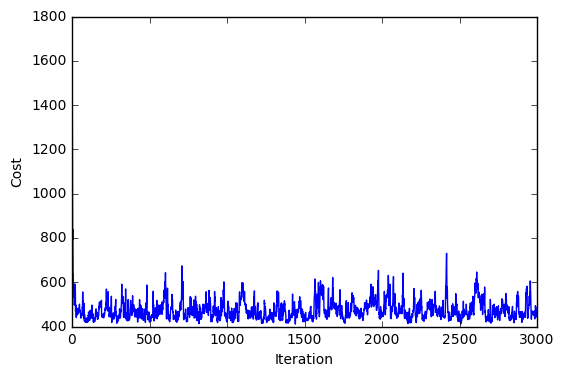

In [66]:
def gd_stoch(data, alpha, num_iter):
    m, N = data.shape
    Xy = np.ones((m,N+1))
    Xy[:,1:] = data
    theta = np.zeros(N)
    costs = [float("inf")]
    for i in range(num_iter):
        np.random.shuffle(Xy)
        for x_i, y_i in ((row[:-1],row[-1]) for row in Xy):
            loss_i = theta.T.dot(x_i) - y_i
            gradient = x_i.T.dot(loss_i)
            theta = theta - alpha * gradient
            loss = Xy[:,:-1].dot(theta) - Xy[:,-1]
            cost = np.sum(np.square(loss)) / (2 * m)
            costs.append(cost)
    return theta, costs

start = time.time()
theta, costs = gd_stoch(data_norm, alpha, 3)
end = time.time()
print('time: {:f} ms'.format((start-end)*1000.0))
print('theta: ', theta)
print('prediction: ', theta.T.dot(x_norm))
plot_costs(costs)

# Mini-Batch Gradient Descent

This can be checked against the stochastic algorithm by commenting out the shuffle in each and setting the batch size to 1.

### Python

time: -9.800196 ms
theta:  [48.78 0.49 -1.18 1.11 -0.90]
prediction:  48.0957931039


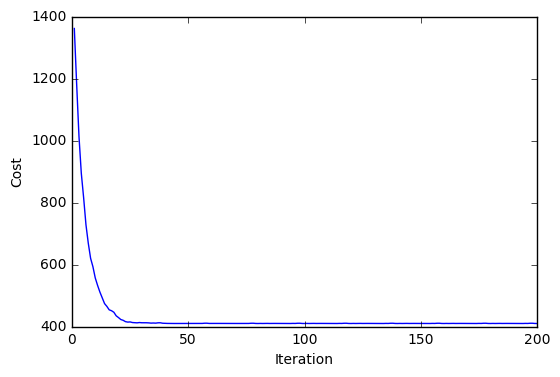

In [67]:
def gd_stoch(data, alpha, num_iter, b=1):
    m, N = data.shape
    Xy = np.ones((m,N+1))
    Xy[:,1:] = data
    theta = np.zeros(N)
    costs = [float("inf")]
    for i in range(num_iter):
#       np.random.shuffle(Xy)
        batches = np.split(Xy, np.arange(b, m, b))
        for B_x, B_y in ((B[:,:-1],B[:,-1]) for B in batches):
            loss_B = B_x.dot(theta) - B_y
            gradient = B_x.T.dot(loss_B) / B_x.shape[0]
            theta = theta - alpha * gradient
            loss = Xy[:,:-1].dot(theta) - Xy[:,-1]
            cost = np.sum(np.square(loss)) / (2 * m)
            costs.append(cost)
    return theta, costs

start = time.time()
theta, costs = gd_stoch(data_norm, alpha, 10, 50)
end = time.time()
print('time: {:f} ms'.format((start-end)*1000.0))
print('theta: ', theta)
print('prediction: ', theta.T.dot(x_norm))
plot_costs(costs)

# Adagrad

### Python

time: -218.755484 ms
theta:  [48.78 0.56 -1.24 1.55 -0.78]
prediction:  48.3515137835


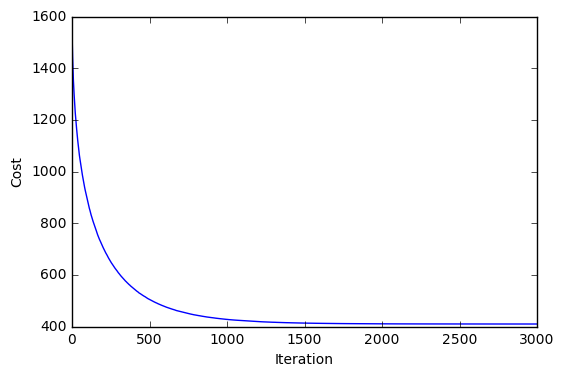

In [68]:
def gd_adagrad(data, alpha, num_iter, b=1):
    m, N = data.shape
    Xy = np.ones((m,N+1))
    Xy[:,1:] = data
    theta = np.ones(N)
    costs = [float("inf")]
    grad_hist = 0
    for i in range(num_iter):
        np.random.shuffle(Xy)
        batches = np.split(Xy, np.arange(b, m, b))
        for B_x, B_y in ((B[:,:-1],B[:,-1]) for B in batches):
            loss_B = B_x.dot(theta) - B_y
            gradient = B_x.T.dot(loss_B) / B_x.shape[0]
            grad_hist += np.square(gradient)
            theta = theta - alpha * gradient / (10**-6 + np.sqrt(grad_hist))
            loss = Xy[:,:-1].dot(theta) - Xy[:,-1]
            cost = np.sum(np.square(loss)) / (2 * m)
            costs.append(cost)
    return theta, costs

start = time.time()
theta, costs = gd_adagrad(data_norm, alpha*10, 150, 50)
end = time.time()
print('time: {:f} ms'.format((start-end)*1000.0))
print('theta: ', theta)
print('prediction: ', theta.T.dot(x_norm))
plot_costs(costs)